In [24]:
#times eries analysis

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import smtplib

from datetime import datetime
from email.message import EmailMessage
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


import pandas as pd
import numpy as np


df=pd.read_csv('HistoricalData_1696286532136.csv')    




# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample the data to get the first day of each month
first_day_of_month_data = df.resample('MS').first()



first_day_of_month_data.reset_index(inplace=True)

# Now the 'Date' column will become a regular column in the DataFrame
print(first_day_of_month_data)

df1 = np.array(first_day_of_month_data)





data=df1[:,3:4]


print(data)


          Date  Close/Last    Volume     Open     High      Low
0   2013-10-01      35.945   8751656   36.020   36.130   35.795
1   2013-11-01      38.030   4221690   37.900   38.215   37.825
2   2013-12-01      39.545   6467854   39.735   40.070   39.460
3   2014-01-01      39.120   5318652   39.075   39.415   38.965
4   2014-02-01      35.440   9515900   36.380   36.395   35.390
..         ...         ...       ...      ...      ...      ...
115 2023-05-01     127.920   4112782  126.920  128.680  126.860
116 2023-06-01     103.630  12025210  104.180  104.600  102.900
117 2023-07-01     109.110   5734199  111.060  111.300  109.110
118 2023-08-01     109.400   4567383  110.000  110.530  109.135
119 2023-09-01     102.360   6359599  101.970  102.960  101.520

[120 rows x 6 columns]
[[36.02]
 [37.9]
 [39.735]
 [39.075]
 [36.38]
 [38.815]
 [37.01]
 [36.405]
 [38.495]
 [38.865]
 [38.27]
 [39.175]
 [44.455]
 [46.675]
 [49.33]
 [48.275]
 [46.34]
 [48.445]
 [50.0]
 [49.94]
 [50.885]
 [54.475]

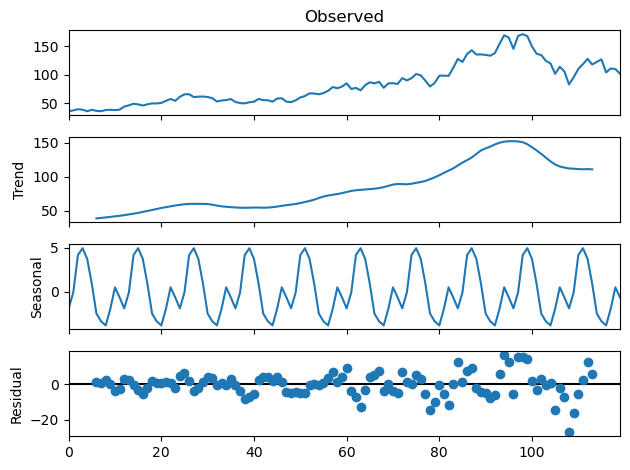

In [26]:
xx = data

decomp = seasonal_decompose(xx,period=12)
decomp.plot()
plt.show()

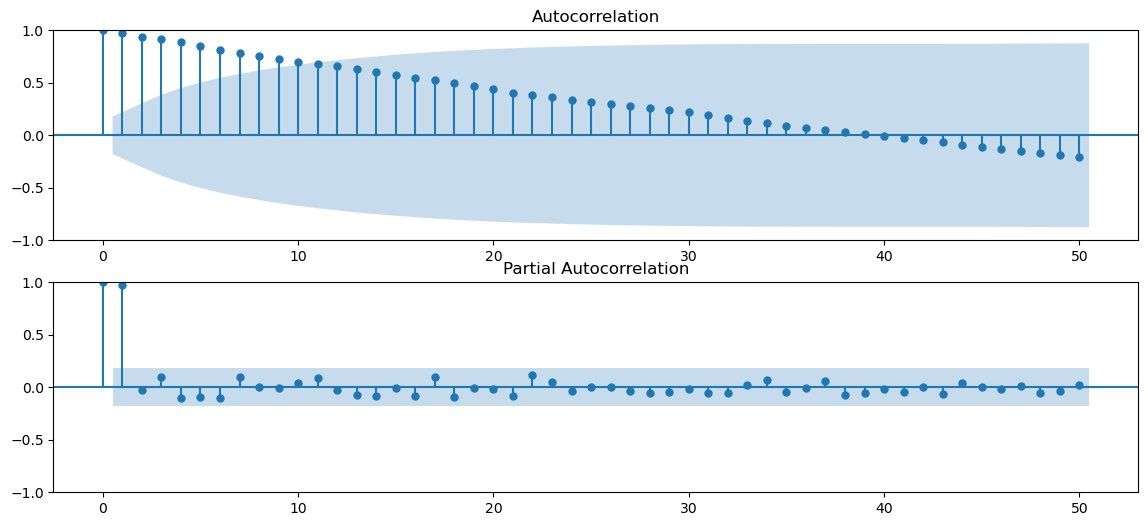

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(xx, lags=50, ax=ax1)
ax2 = plot_pacf(xx, lags=50, ax=ax2)

plt.show()

In [28]:
result = adfuller(xx)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.454843
p-value: 0.555720
Critical Test Statistics Values:
	1%: -3.490
	5%: -2.887
	10%: -2.581


13      0.34
14      0.82
15    -0.395
16      0.76
17     -0.33
       ...  
115    14.44
116   -18.14
117    25.07
118   -13.42
119     0.17
Name: Value, Length: 107, dtype: object


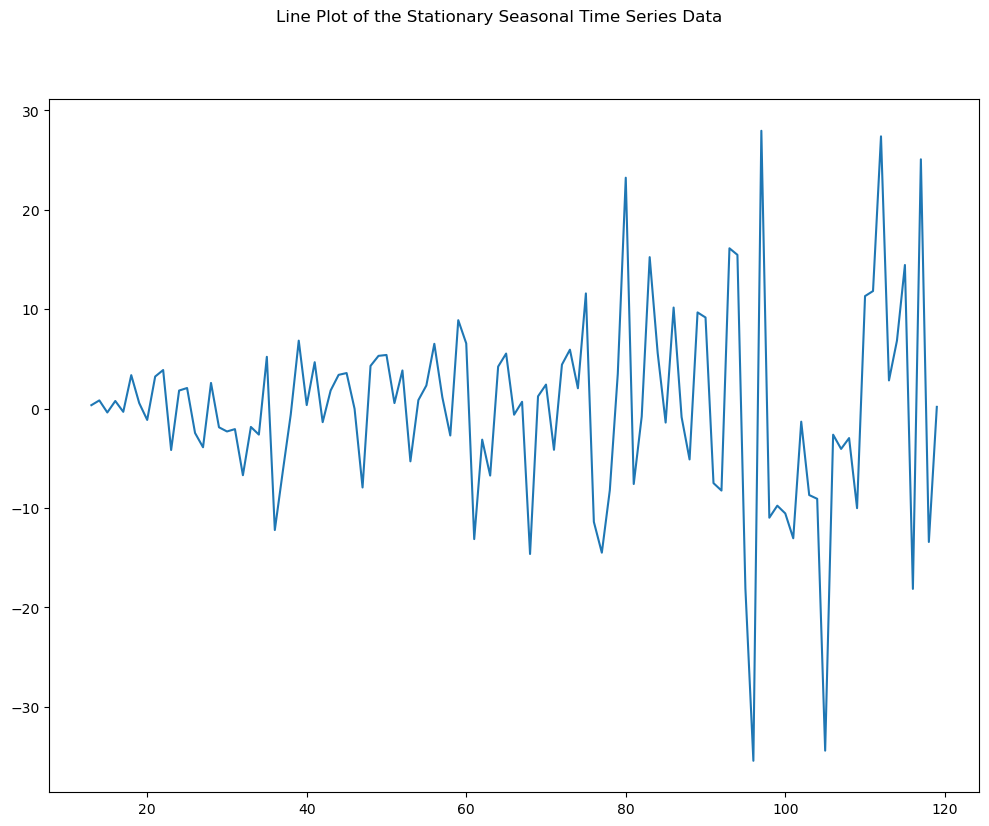

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert the NumPy array 'xx' to a pandas DataFrame
time_series = pd.DataFrame(xx, columns=['Value'])

# Perform differencing
time_series_diff = time_series['Value'].diff().diff(12)
time_series_diff.dropna(inplace=True)


print(time_series_diff)

# Plot differenced data
fig, ax = plt.subplots(figsize=(12, 9))
fig.suptitle('Line Plot of the Stationary Seasonal Time Series Data')
time_series_diff.plot(ax=ax)
plt.show()


In [30]:
result = adfuller(time_series_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.988639
p-value: 0.001471
Critical Test Statistics Values:
	1%: -3.501
	5%: -2.892
	10%: -2.583


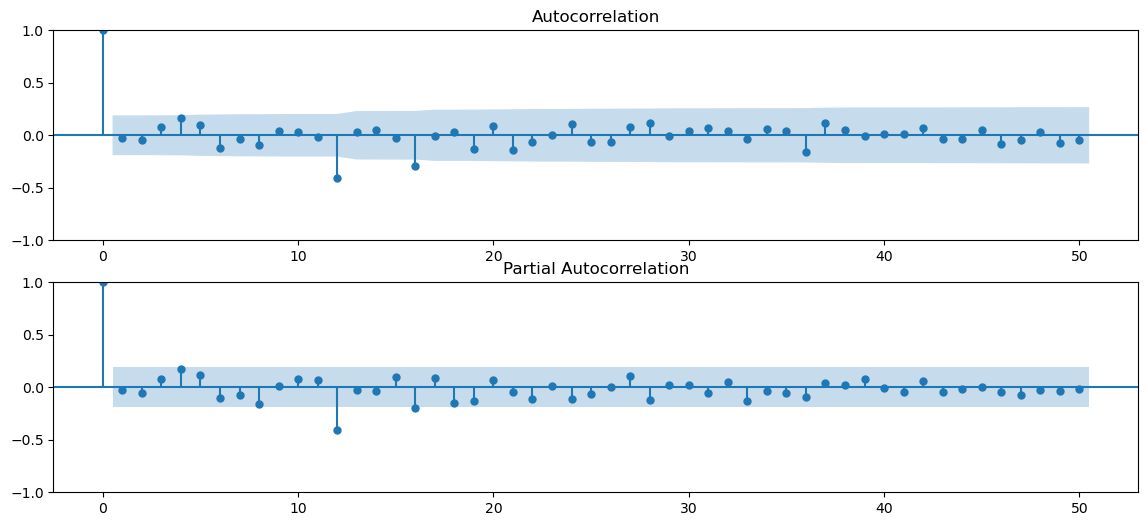

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(time_series_diff, lags=50, ax=ax1)
ax2 = plot_pacf(time_series_diff, lags=50, ax=ax2)

plt.show()

In [32]:
print(len(xx))
t1 = len(xx)  

train = xx[:int(0.85*t1)]

print(len(train))
test = xx[int(0.85*t1):]
print(len(test))

120
102
18


In [33]:
len(test)

18

In [34]:
import pmdarima as pm
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

forecast_conf_int_d_i = []


model_List_d_i = []
for i in range(1,6):
    model = pm.auto_arima(train, d=i, D=1, seasonal=True, m=12, trend='c', start_p=1, start_q=1, max_order=6, test='adf', stepwise=True, trace=True)

    # Get predictions for the test data
    forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

    forecast_conf_int_d_i.append((forecast, conf_int))

    model_List_d_i.append(model)

    r2_arima = r2_score(test, forecast)
    print("R-squared (R2) Score for ARIMA:", r2_arima)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=640.081, Time=0.00 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=621.475, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=618.568, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=641.590, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=620.482, Time=0.17 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=620.515, Time=0.82 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=621.332, Time=0.08 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=620.497, Time=0.87 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=616.594, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=618.504, Time=0.09 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=618.540, Time=0.64 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=619.630, Time=0.05 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=618.515, Time=0.72 sec
 ARIMA(1,1,0)(0,1,1)[12]             

In [35]:
import pmdarima as pm
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

forecast_conf_int_D_i = []


model_List_D_i = []
for i in range(1,6):
    model = pm.auto_arima(train, d=1, D=i, seasonal=True, m=12, trend='c', start_p=1, start_q=1, max_order=6, test='adf', stepwise=True, trace=True)

    # Get predictions for the test data
    forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

    forecast_conf_int_D_i.append((forecast, conf_int))

    model_List_D_i.append(model)

    r2_arima = r2_score(test, forecast)
    print("R-squared (R2) Score for ARIMA:", r2_arima)



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=640.081, Time=0.00 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=621.475, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=618.568, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=641.590, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=620.482, Time=0.17 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=620.515, Time=0.73 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=621.332, Time=0.08 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=620.497, Time=0.95 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=616.594, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=618.504, Time=0.09 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=618.540, Time=0.62 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=619.630, Time=0.05 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=618.515, Time=0.94 sec
 ARIMA(1,1,0)(0,1,1)[12]             

18
18
[Timestamp('2022-04-01 00:00:00'), Timestamp('2022-05-01 00:00:00'), Timestamp('2022-06-01 00:00:00'), Timestamp('2022-07-01 00:00:00'), Timestamp('2022-08-01 00:00:00'), Timestamp('2022-09-01 00:00:00'), Timestamp('2022-10-01 00:00:00'), Timestamp('2022-11-01 00:00:00'), Timestamp('2022-12-01 00:00:00'), Timestamp('2023-01-01 00:00:00'), Timestamp('2023-02-01 00:00:00'), Timestamp('2023-03-01 00:00:00'), Timestamp('2023-04-01 00:00:00'), Timestamp('2023-05-01 00:00:00'), Timestamp('2023-06-01 00:00:00'), Timestamp('2023-07-01 00:00:00'), Timestamp('2023-08-01 00:00:00'), Timestamp('2023-09-01 00:00:00')]
actual_values
[134.45 124.43 119.83 101.64 114.0 105.8 83.13 95.69 110.09 118.55 127.9
 117.95 122.5 126.92 104.18 111.06 110.0 101.97]
predicted_values
[135.29971796 131.93308496 145.75132568 163.85529341 187.81243181
 184.16723657 144.48865974 183.74871183 186.31236311 176.0489141
 142.19041765 126.31023744 130.61709723 118.26724053 132.12296156
 161.59186852 204.7023053  185.

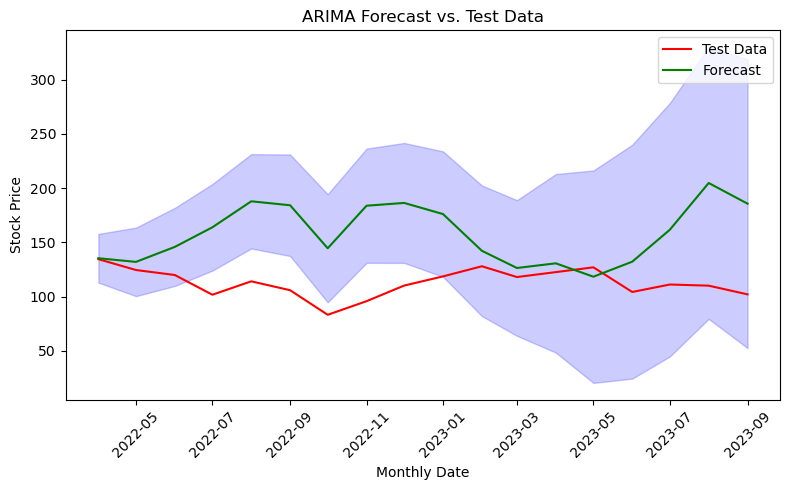

1 no. model when D= 1 and d =1
R-squared (R2) Score for ARIMA: -11.16371724439426
Mean Squared Error: 1886.9344539328947
Spearman's Rank Correlation: -0.23426212590299278
Kendall's Tau: -0.18954248366013074
Pearson Correlation: -0.30545771990023846
2 no. model when D= 1 and d =2
R-squared (R2) Score for ARIMA: -21.204915161177745
Mean Squared Error: 3444.606498362394
Spearman's Rank Correlation: 0.1847265221878225
Kendall's Tau: 0.15032679738562094
Pearson Correlation: 0.11140857045210498
3 no. model when D= 1 and d =3
R-squared (R2) Score for ARIMA: -1137.415385233817
Mean Squared Error: 176600.2259116105
Spearman's Rank Correlation: 0.1847265221878225
Kendall's Tau: 0.15032679738562094
Pearson Correlation: 0.11013011701114143
4 no. model when D= 1 and d =4
R-squared (R2) Score for ARIMA: -16454.476501841076
Mean Squared Error: 2552706.9516119245
Spearman's Rank Correlation: 0.1847265221878225
Kendall's Tau: 0.15032679738562094
Pearson Correlation: 0.10500041341816645
5 no. model when

In [45]:
print(len(test))
test_dates = df1[len(train):, 0]

print(len(test_dates))
test_dates = list(test_dates)

print(test_dates)



forecast, conf_int = forecast_conf_int_D_i[2]

actual_values, predicted_values = test.ravel(), forecast

print('actual_values')
print(actual_values)
print('predicted_values')
print(predicted_values)


plt.figure(figsize=(8, 5))
plt.plot(test_dates, test, label='Test Data', color='red')  # Use the date column as x-axis
plt.plot(test_dates, forecast, label='Forecast', color='green')
plt.fill_between(test_dates, conf_int[:, 0], conf_int[:, 1], alpha=0.2, color='blue')

plt.legend()
plt.xlabel('Monthly Date')
plt.ylabel('Stock Price')
plt.title('ARIMA Forecast vs. Test Data')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability



# min_value = float(min(min(test), min(forecast)))
# max_value = float(max(max(test), max(forecast)))
# plt.ylim(min_value, max_value)

plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

from sklearn.metrics import r2_score
import numpy as np
from scipy.stats import spearmanr, kendalltau
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr


for ii in range(0,5):

    print(str(ii+1)+' no. model'+" when D= 1 and d =" + str(ii+1))

    forecast, conf_int = forecast_conf_int_d_i[ii]


    # Assuming you have already trained the ARIMA model and made predictions
    r2_arima = r2_score(test, forecast)
    print("R-squared (R2) Score for ARIMA:", r2_arima)

    actual_values, predicted_values = test.ravel(), forecast



    mse = mean_squared_error(actual_values, predicted_values)
    print("Mean Squared Error:", mse)

    # Calculate Spearman's Rank Correlation
    spearman_corr, _ = spearmanr(actual_values, predicted_values)
    print("Spearman's Rank Correlation:", spearman_corr)

    # Calculate Kendall's Tau
    kendall_tau, _ = kendalltau(actual_values, predicted_values)
    print("Kendall's Tau:", kendall_tau)

    # Calculate Pearson Correlation
    pearson_corr, _ = pearsonr(actual_values, predicted_values)
    print("Pearson Correlation:", pearson_corr)




for ii in range(0,5):

    print(str(ii+1)+' no. model'+" when d = 1 and D = " + str(ii+1))

    forecast, conf_int = forecast_conf_int_D_i[ii]


    # Assuming you have already trained the ARIMA model and made predictions
    r2_arima = r2_score(test, forecast)
    print("R-squared (R2) Score for ARIMA:", r2_arima)

    actual_values, predicted_values = test.ravel(), forecast



    mse = mean_squared_error(actual_values, predicted_values)
    print("Mean Squared Error:", mse)

    # Calculate Spearman's Rank Correlation
    spearman_corr, _ = spearmanr(actual_values, predicted_values)
    print("Spearman's Rank Correlation:", spearman_corr)

    # Calculate Kendall's Tau
    kendall_tau, _ = kendalltau(actual_values, predicted_values)
    print("Kendall's Tau:", kendall_tau)

    # Calculate Pearson Correlation
    pearson_corr, _ = pearsonr(actual_values, predicted_values)
    print("Pearson Correlation:", pearson_corr)

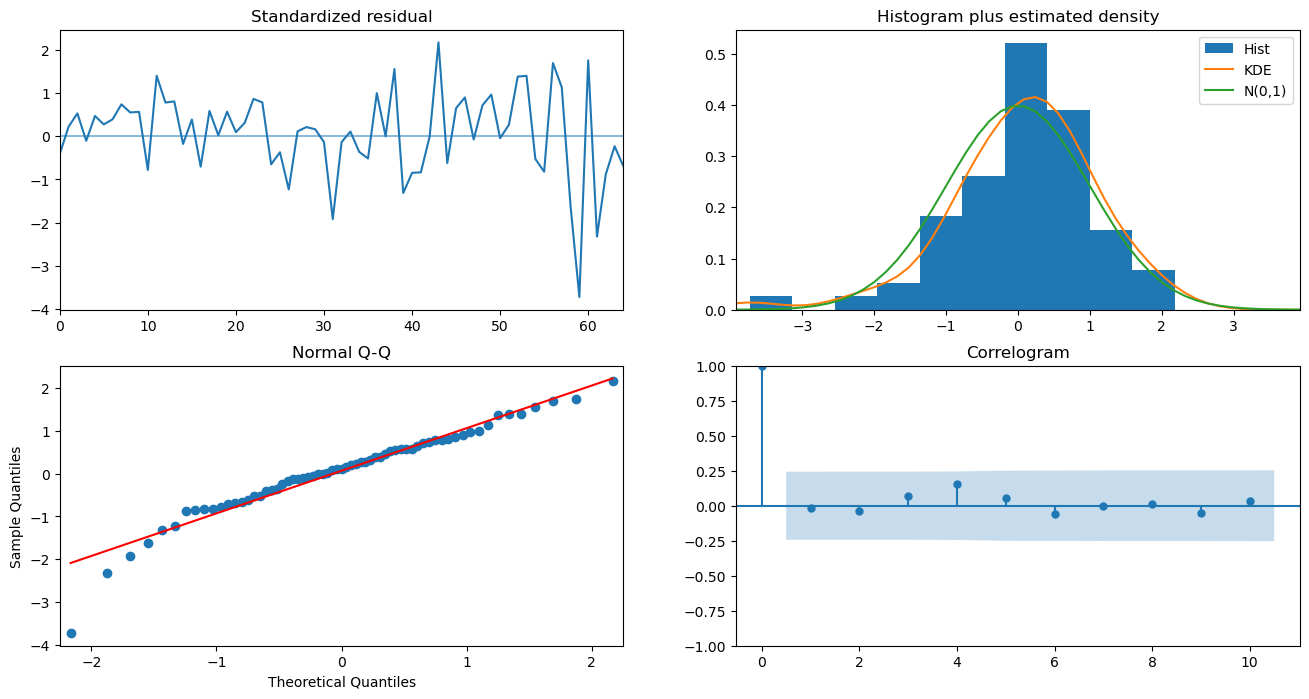

In [41]:
model_List_D_i[2].plot_diagnostics(figsize=(16, 8))
plt.savefig('modeldiagnostics')
plt.show()